# PROYECTO FINAL
---
El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Esto, con el fin de implementar nuevas estrategias para aumentar la productividad de los operadores y a su vez la satisfacción en los clientes. 

### 1. Objetivo general; Identificar operadores ineficaces en telecomunicaciones
---

Criterios de ineficiencia:

 - Existe una gran cantidad de llamadas entrantes perdidas (internas y externas)

 - Tiempo de espera prolongado para las llamadas entrantes

 - Número reducido de llamadas salientes. 


### 2. Descripción de los datos 
---

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 



### 3. Descarga de datos 
---

In [1]:
# Importación de librerías 
import pandas as pd
import numpy as np

from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Asignación de variable al dataset de clientes 
def load_data():
    try:
        # Intentar cargar los datos de la forma local
        clients = pd.read_csv('telecom_clients_us.csv', sep=',') # Reemplaza con la ruta local real
        return clients
    except FileNotFoundError:
        # Si la carga local falla, intentar la carga desde la instancia de revisión
        try:
            clients = pd.read_csv('/datasets/telecom_clients_us.csv', sep=',')
            return clients
        except FileNotFoundError:
            print("No se pudo encontrar el archivo en ninguna de las ubicaciones.")
            return None

# Llamar a la función para cargar los datos
clients = load_data()

In [3]:
# Visualización de dataset
clients.info()
clients.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


In [4]:
#Asignación de variable al dataset de clientes 
def load_data():
    try:
        # Intentar cargar los datos de la forma local
        calls_data= pd.read_csv('telecom_dataset_us.csv', sep=',') # Reemplaza con la ruta local real
        return calls_data
    except FileNotFoundError:
        # Si la carga local falla, intentar la carga desde la instancia de revisión
        try:
            calls_data = pd.read_csv('/datasets/telecom_dataset_us.csv', sep=',')
            return calls_data
        except FileNotFoundError:
            print("No se pudo encontrar el archivo en ninguna de las ubicaciones.")
            return None

# Llamar a la función para cargar los datos
calls_data = load_data()

In [5]:
#Visualización de dataset
calls_data.info()
calls_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


### 4. Preprocesamiento de datos (EDA)
---

In [177]:
#Corrección de tipo de datos, búsqueda de valores ausentes y duplicados.
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')
print('Correción de tipo de datos:')
print(clients.dtypes)
print()
print('Número de valores duplicados:', clients.duplicated().sum())
print()
print("Número de valores ausentes:")
print(clients.isna().sum().to_string(index=True))

Correción de tipo de datos:
user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
month_start             int32
day_start              object
dtype: object

Número de valores duplicados: 0

Número de valores ausentes:
user_id        0
tariff_plan    0
date_start     0
month_start    0
day_start      0


Como podemos observar, se cambiaron los tipos de datos de la columna 'date' ya que estaban como tipo objeto cuando en realidad la columna representa fechas. Otra cosa que podemos notar en este dataframe es que, no existen valores duplicados ausentes, ni duplicados. 

In [7]:
#Corrección de tipo de datos y búsqueda de valores ausentes y duplicados.
calls_data['date'] = pd.to_datetime(calls_data['date'], utc=False)
calls_data['date'] = calls_data['date'].dt.tz_localize(None)
calls_data['internal'] = calls_data['internal'].astype('bool')
print('Correción de tipo de datos:')
print(calls_data.dtypes)
print('-----------------------------------------------')
print('Número de valores duplicados:', calls_data.duplicated().sum())
print('Porcentaje de valores duplicados:',100*((calls_data.duplicated().sum())/calls_data.shape[0]).round(2))
print('-----------------------------------------------')
print('Número de valores ausentes:')
print(calls_data.isna().sum().to_string(index=True))
print()
print('Porcentaje de valores ausentes:',100*((calls_data['operator_id'].isna().sum())/calls_data.shape[0]).round(2))

Correción de tipo de datos:
user_id                         int64
date                   datetime64[ns]
direction                      object
internal                         bool
operator_id                   float64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
dtype: object
-----------------------------------------------
Número de valores duplicados: 4900
Porcentaje de valores duplicados: 9.0
-----------------------------------------------
Número de valores ausentes:
user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0

Porcentaje de valores ausentes: 15.0


En este segundo dataframe podemos observar varias cosas, se hizo el cambio de tipo de datos de las columnas 'date' y 'internal'. Así mismo, se buscaron el número de valores duplicados y ausentes, encontrando 4,900 duplicados alrededor del 9% de dataframe y 8,172 valores ausentes en la columna 'operator_id' siendo al rededor del 15% porciento del total de valores. 

En la siguiente celda, eliminaremos los valores duplicados y reemplazaremos los valores ausentes de la columna 'operato_id' por con el número 0, indicando que no hay registro de un ID del operador.

In [8]:
# Eliminación de duplicados y colocación de 0 en filas con valores ausentes
calls_data['operator_id'] = calls_data['operator_id'].fillna(0).astype('int')
calls_data['direction'] = calls_data['direction'].astype('category')
calls_data.drop_duplicates().reset_index(drop=True)
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  category      
 3   internal             53902 non-null  bool          
 4   operator_id          53902 non-null  int64         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), category(1), datetime64[ns](1), int64(5)
memory usage: 2.6 MB


In [9]:
# Calcular la diferencia del tiempo de espera por llamada
calls_data['waiting_time'] = calls_data['total_call_duration'] - calls_data['call_duration'] 
calls_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
0,166377,2019-08-04,in,False,0,True,2,0,4,4
1,166377,2019-08-05,out,True,880022,True,3,0,5,5
2,166377,2019-08-05,out,True,880020,True,1,0,1,1
3,166377,2019-08-05,out,True,880020,False,1,10,18,8
4,166377,2019-08-05,out,False,880022,True,3,0,25,25


In [10]:
#Analisis estadístico del dataframe 'calls_data'
calls_data.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,53902.0,167295.344477,166377.0,166782.0,167162.0,167819.0,168606.0,598.883775
date,53902,2019-10-23 01:00:32.191755264,2019-08-02 00:00:00,2019-10-04 00:00:00,2019-10-28 00:00:00,2019-11-14 00:00:00,2019-11-28 00:00:00,NaN
operator_id,53902.0,777581.369151,0.0,890416.0,906406.0,930020.0,973286.0,329292.849066
calls_count,53902.0,16.451245,1.0,1.0,4.0,12.0,4817.0,62.91717
call_duration,53902.0,866.684427,0.0,0.0,38.0,572.0,144395.0,3731.791202
total_call_duration,53902.0,1157.133297,0.0,47.0,210.0,902.0,166155.0,4403.468763
waiting_time,53902.0,290.44887,0.0,17.0,55.0,201.0,46474.0,1127.905654


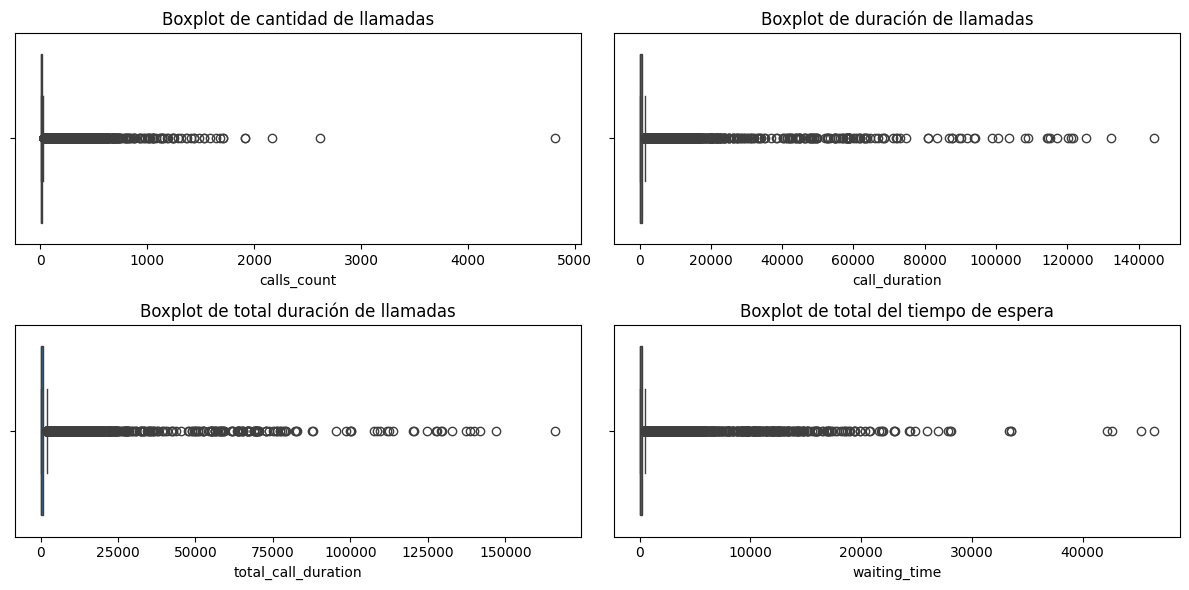

In [181]:
# Visión de la distribución de los datos, incluyendo la mediana, los cuartiles y los valores atípicos
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Boxplot de cantidad de llamadas')
sns.boxplot(x=calls_data['calls_count'])

plt.subplot(2, 2, 2)
plt.title('Boxplot de duración de llamadas')
sns.boxplot(x=calls_data['call_duration'])

plt.subplot(2, 2, 3)
plt.title('Boxplot de total duración de llamadas')
sns.boxplot(x=calls_data['total_call_duration'])

plt.subplot(2, 2, 4)
plt.title('Boxplot de total del tiempo de espera')
sns.boxplot(x=calls_data['waiting_time'])

plt.tight_layout()
plt.show()

Interpretación de Cada Gráfico

- Boxplot de cantidad de llamadas:

Mayoría de llamadas: La mayoría de los días o períodos analizados tienen una cantidad similar de llamadas, ya que la caja es relativamente estrecha.

Valores atípicos: Hay algunos días con una cantidad significativamente mayor de llamadas, representados por los puntos fuera de los bigotes. Estos podrían corresponder a días festivos, promociones especiales o eventos que generaron un mayor volumen de llamadas.

- Boxplot de duración de llamadas:

Duración variable: La duración de las llamadas individuales varía considerablemente, como lo indica el amplio rango intercuartílico.

Llamadas largas: Hay algunas llamadas muy largas, representadas por los valores atípicos en el extremo derecho. Estas llamadas podrían ser debido a consultas complejas, problemas técnicos o errores en el sistema.

- Boxplot de total duración de llamadas:

Similar al de duración: Este gráfico muestra una distribución similar al de la duración individual, pero a una escala mayor. La variabilidad en la duración total de las llamadas está influenciada por el número de llamadas y su duración individual.

- Boxplot de total del tiempo de espera:

Tiempo de espera variable: El tiempo de espera de los clientes también varía considerablemente.
Largos tiempos de espera: Hay algunos casos con tiempos de espera muy largos, lo que podría indicar problemas en la atención al cliente o una alta demanda en ciertos momentos.

- Conclusiones Generales

Variabilidad en los datos: Tanto la cantidad de llamadas, la duración y el tiempo de espera muestran una considerable variabilidad.

Valores atípicos: La presencia de valores atípicos en todos los gráficos sugiere la existencia de eventos o situaciones excepcionales que afectan los datos.

Posibles áreas de mejora: Los largos tiempos de espera y las llamadas de larga duración podrían ser áreas a mejorar en el servicio al cliente.

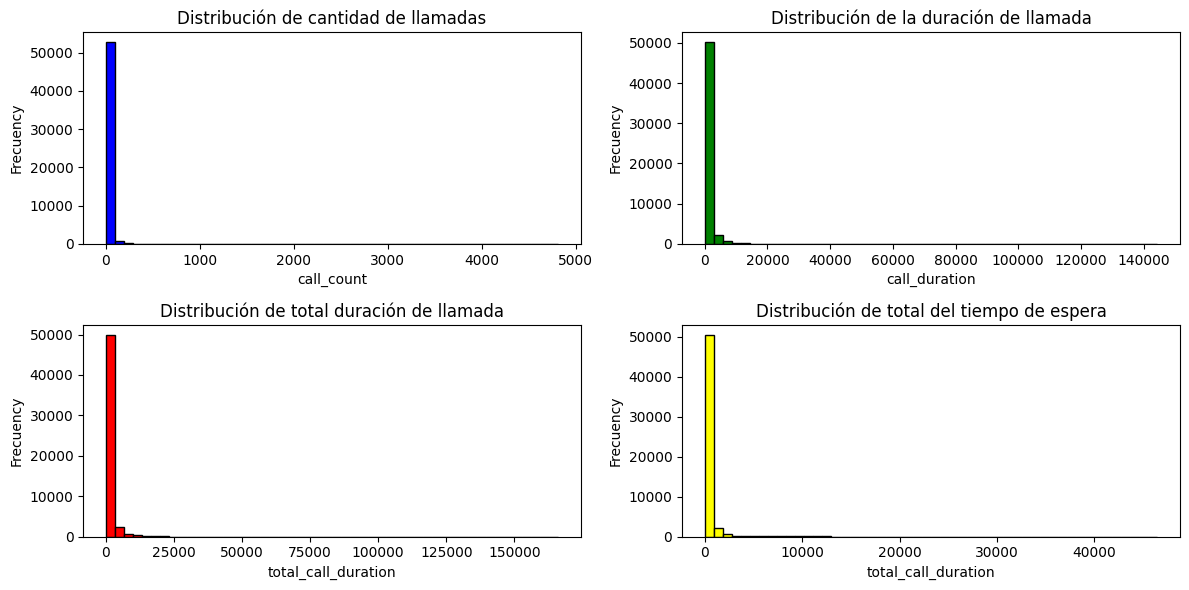

In [180]:
# Representación gráfica de la frecuencia con la que ocurren diferentes valores dentro de un conjunto de datos
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(calls_data['calls_count'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de cantidad de llamadas')
plt.xlabel('call_count')
plt.ylabel('Frecuency')

plt.subplot(2, 2, 2)
plt.hist(calls_data['call_duration'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de la duración de llamada')
plt.xlabel('call_duration')
plt.ylabel('Frecuency')

plt.subplot(2, 2, 3)
plt.hist(calls_data['total_call_duration'], bins=50, color='red', edgecolor='black')
plt.title('Distribución de total duración de llamada')
plt.xlabel('total_call_duration')
plt.ylabel('Frecuency')

plt.subplot(2, 2, 4)
plt.hist(calls_data['waiting_time'], bins=50, color='yellow', edgecolor='black')
plt.title('Distribución de total del tiempo de espera')
plt.xlabel('total_call_duration')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

Interpretación de cada histograma:

- Distribución de la cantidad de llamadas:

Concentración en valores bajos: La mayoría de los días o períodos analizados tienen un número relativamente bajo de llamadas, ya que la frecuencia es más alta en los valores cercanos a cero.

Pocos días con muchas llamadas: Hay pocos días donde se registra un número muy alto de llamadas, lo cual se observa por las barras más altas en la parte derecha del histograma.

- Distribución de la duración de la llamada:

Amplia variedad: La duración de las llamadas varía significativamente, desde llamadas muy cortas hasta llamadas muy largas.
Mayor concentración en valores bajos: La mayoría de las llamadas tienen una duración corta, como se observa por la barra más alta al inicio del histograma.

- Distribución de la duración total de llamadas:

Similar a la duración individual: La distribución de la duración total de las llamadas sigue un patrón similar al de la duración individual, aunque a una escala mayor.

Influencia del número de llamadas: La duración total está influenciada tanto por la cantidad de llamadas como por la duración promedio de cada llamada.

- Distribución del tiempo total de espera:

Mayoría de tiempos de espera cortos: La mayoría de los clientes esperan poco tiempo para ser atendidos, como se observa por las barras más altas al inicio del histograma.

Algunos tiempos de espera largos: Hay algunos casos donde los clientes esperan mucho tiempo, lo cual se representa por las barras más altas en la parte derecha del histograma.

- Conclusiones generales:

Variabilidad en los datos: Tanto la cantidad de llamadas, la duración y el tiempo de espera muestran una considerable variabilidad.

Concentración en valores bajos: En general, hay una tendencia a que los valores se concentren en la parte inferior de cada histograma.

Presencia de valores atípicos: La presencia de barras altas en los extremos de los histogramas indica la existencia de valores atípicos, es decir, valores que se alejan significativamente del resto de los datos.

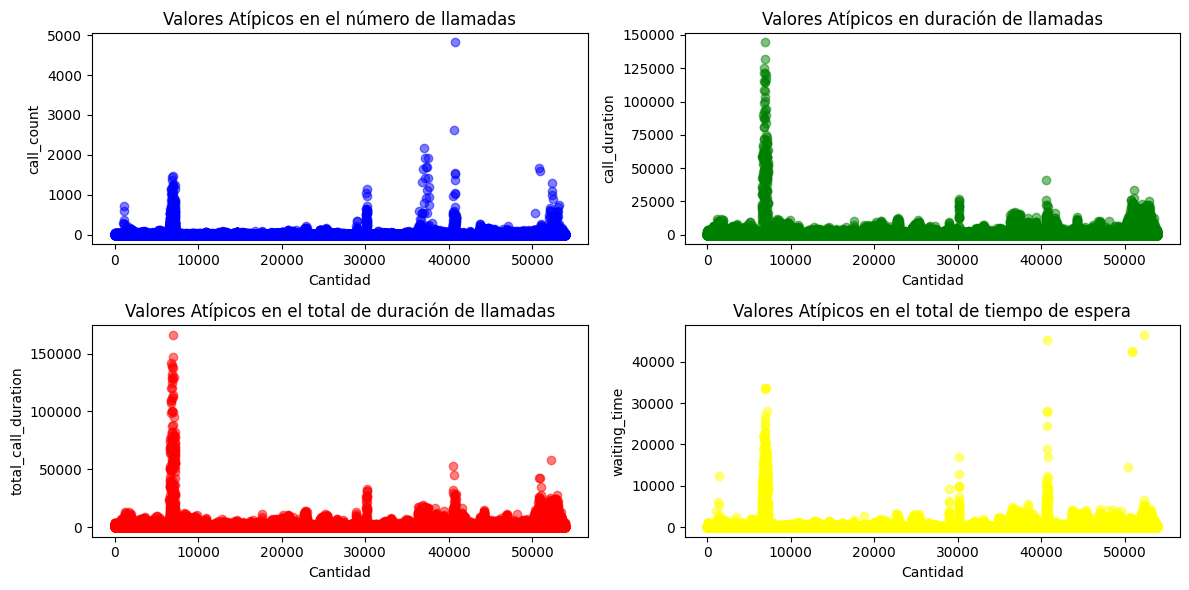

In [182]:
# Mostrar la distribución de valores atípicos en cuatro variables relacionadas con las llamadas telefónicas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(range(len(calls_data)), calls_data['calls_count'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en el número de llamadas')
plt.xlabel('Cantidad')
plt.ylabel('call_count')

plt.subplot(2, 2, 2)
plt.scatter(range(len(calls_data)), calls_data['call_duration'], alpha=0.5, color='green')
plt.title('Valores Atípicos en duración de llamadas')
plt.xlabel('Cantidad')
plt.ylabel('call_duration')

plt.subplot(2, 2, 3)
plt.scatter(range(len(calls_data)), calls_data['total_call_duration'], alpha=0.5, color='red')
plt.title('Valores Atípicos en el total de duración de llamadas')
plt.xlabel('Cantidad')
plt.ylabel('total_call_duration')

plt.subplot(2, 2, 4)
plt.scatter(range(len(calls_data)), calls_data['waiting_time'], alpha=0.5, color='yellow')
plt.title('Valores Atípicos en el total de tiempo de espera')
plt.xlabel('Cantidad')
plt.ylabel('waiting_time')

plt.tight_layout()
plt.show()

Análisis por Gráfico:

- Valores Atípicos en el número de llamadas:

Picos pronunciados: Se observan picos muy pronunciados en ciertos valores de cantidad de llamadas, lo que indica que hay días o períodos con un número inusualmente alto de llamadas.

Distribución dispersa: Fuera de estos picos, los valores atípicos se distribuyen de manera más dispersa, lo que sugiere una variabilidad significativa en el número de llamadas.

- Valores Atípicos en la duración de las llamadas:

Concentración en valores altos: La mayoría de los valores atípicos se encuentran en la parte superior del gráfico, lo que indica que hay un número considerable de llamadas extremadamente largas.

Distribución más uniforme: En comparación con el gráfico anterior, la distribución de los valores atípicos es más uniforme, lo que sugiere una variabilidad más constante en la duración de las llamadas.

- Valores Atípicos en el total de duración de llamadas:

Similar al gráfico de duración: La distribución de los valores atípicos es similar al gráfico de la duración individual, lo que confirma la relación entre ambas variables.

Influencia del número de llamadas: La duración total de las llamadas también se ve afectada por el número de llamadas realizadas.

- Valores Atípicos en el tiempo total de espera:

Concentración en valores altos: Al igual que en la duración de las llamadas, la mayoría de los valores atípicos se encuentran en la parte superior del gráfico, indicando largos tiempos de espera.

Posibles causas: Los largos tiempos de espera podrían deberse a problemas en el sistema, alta demanda de servicio o características específicas de ciertos clientes.

### 5. Análisis por operador (Identificación de ineficientes)
---

In [15]:
#Agregar columnas de fecha por mes y día
calls_data['month_call'] = calls_data['date'].dt.month
calls_data['day_call'] = calls_data['date'].dt.strftime('%d')

clients['month_start'] = clients['date_start'].dt.month
clients['day_start']= clients['date_start'].dt.strftime('%d')

# Unión de datasets
df_merged= pd.merge(calls_data, clients, on='user_id')

df_merged.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,is_incoming,month_call,day_call,tariff_plan,date_start,month_start,day_start
0,166377,2019-08-04,in,False,0,True,2,0,4,4,1,8,04,B,2019-08-01,8,01
1,166377,2019-08-05,out,True,880022,True,3,0,5,5,0,8,05,B,2019-08-01,8,01
2,166377,2019-08-05,out,True,880020,True,1,0,1,1,0,8,05,B,2019-08-01,8,01


In [170]:
#Agrupar por operador y contar llamadas perdidas
missed_calls_per_operator = df_merged.groupby('operator_id').agg({'is_missed_call':'sum'})
missed_calls_per_operator= missed_calls_per_operator.sort_values(by='is_missed_call', ascending=False).head(10)

print(missed_calls_per_operator)

labels = missed_calls_per_operator.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(missed_calls_per_operator, x=labels, y='is_missed_call',
            labels={ 'x':'ID del Operador', 'is_missed_call':'Llamadas Perdidas'},
            title='Top 10 de operadores con mayor cantidad de llamadas perdidas',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

             is_missed_call
operator_id                
0                      8050
885876                  135
891410                  131
893804                  130
901880                  128
891414                  126
901884                  115
885890                  110
887276                  101
879898                  100


<Figure size 640x480 with 0 Axes>

In [184]:
missed_calls_per_operator = df_merged[df_merged['direction'] == 'in']
missed_calls_per_operator = missed_calls_per_operator.groupby('operator_id').agg({'is_missed_call':'count'})
missed_calls_per_operator = missed_calls_per_operator.sort_values(by= 'is_missed_call', ascending=False).head(10)
print(missed_calls_per_operator)

labels = missed_calls_per_operator.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(missed_calls_per_operator, x=labels, y='is_missed_call',
            labels={ 'x':'ID del Operador', 'is_missed_call':'Llamadas Perdidas'},
            title='Top 10 de operadores con mayor cantidad <br> de llamadas  perdidas ENTRANTES',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()


             is_missed_call
operator_id                
0                      7972
901880                  121
893804                  116
908960                  116
885890                  103
885876                  103
901884                  102
908958                  100
900892                   93
893402                   91


<Figure size 640x480 with 0 Axes>

In [185]:
missed_calls_per_operator = df_merged[df_merged['direction'] == 'out']
missed_calls_per_operator = missed_calls_per_operator.groupby('operator_id').agg({'is_missed_call':'sum'})
missed_calls_per_operator = missed_calls_per_operator.sort_values(by= 'is_missed_call', ascending=False).head(10)
print(missed_calls_per_operator)

labels = missed_calls_per_operator.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(missed_calls_per_operator, x=labels, y='is_missed_call',
            labels={ 'x':'ID del Operador', 'is_missed_call':'Llamadas Perdidas'},
            title='Top 10 de operadores con mayor cantidad <br> de llamadas perdidas SALIENTES',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

             is_missed_call
operator_id                
0                       151
891410                  129
891414                  125
893804                  119
901880                  118
901884                  114
885876                  114
879898                  100
887276                   98
905538                   97


<Figure size 640x480 with 0 Axes>

In [167]:
waiting_time_by_direccion = df_merged[df_merged['direction'] == 'in']
waiting_time_by_direccion = waiting_time_by_direccion.groupby('operator_id').agg({'waiting_time':'mean'})
waiting_time_by_direccion  = waiting_time_by_direccion .sort_values(by= 'waiting_time', ascending=False).head(10)
print(waiting_time_by_direccion)

labels = waiting_time_by_direccion .index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_by_direccion , x=labels, y='waiting_time',
            labels={ 'x':'ID del Operador', 'waiting_time':'Tiempo de espera'},
            title='Top 10 de operadores con mayor tiempo de espera promedio',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

             waiting_time
operator_id              
919794        1039.540541
906070         853.312500
919790         839.802817
931458         655.236364
906076         611.500000
921318         607.466667
919204         579.277778
919552         556.776316
913938         535.047619
919554         518.154762


<Figure size 640x480 with 0 Axes>

In [186]:
waiting_time_by_direccion = df_merged[df_merged['direction'] == 'out']
waiting_time_by_direccion = waiting_time_by_direccion.groupby('operator_id').agg({'waiting_time':'count'})
waiting_time_by_direccion  = waiting_time_by_direccion.sort_values(by= 'waiting_time', ascending=False).head(10)
print(waiting_time_by_direccion)

labels = waiting_time_by_direccion .index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_by_direccion , x=labels, y='waiting_time',
            labels={ 'x':'ID del Operador', 'waiting_time':'Tiempo de espera'},
            title='Top 10 de operadores con mayor tiempo de espera <br> en llamadas SALIENTES',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

             waiting_time
operator_id              
901884                246
885876                216
901880                216
887276                215
891414                212
891410                211
893804                209
905538                209
0                     200
879898                187


<Figure size 640x480 with 0 Axes>

In [187]:
waiting_time_by_direccion = df_merged[df_merged['direction'] == 'in']
waiting_time_by_direccion = waiting_time_by_direccion.groupby('operator_id').agg({'waiting_time':'count'})
waiting_time_by_direccion  = waiting_time_by_direccion.sort_values(by= 'waiting_time', ascending=False).head(10)
print(waiting_time_by_direccion)

labels = waiting_time_by_direccion .index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_by_direccion , x=labels, y='waiting_time',
            labels={ 'x':'ID del Operador', 'waiting_time':'Tiempo de espera'},
            title='Top 10 de operadores con mayor tiempo de espera <br> en llamadas ENTRANTES',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

             waiting_time
operator_id              
0                    7972
901880                121
893804                116
908960                116
885890                103
885876                103
901884                102
908958                100
900892                 93
893402                 91


<Figure size 640x480 with 0 Axes>

In [176]:
out_calls = calls_data[calls_data['direction'] == 'out']

# Agrupar por operador y contar el número de llamadas salientes
out_calls_per_operator = out_calls.groupby('operator_id').size().reset_index(name='num_out_calls')
out_calls_per_operator= out_calls_per_operator.sort_values(by= 'num_out_calls', ascending=True).head(10)
print(out_calls_per_operator)


def custom_label_format(operator_id):
    return f"ID {operator_id}"  


labels = out_calls_per_operator['operator_id'].apply(custom_label_format).tolist()

fig = px.bar(out_calls_per_operator, x=labels, y='num_out_calls',
            labels={ 'x':'ID del Operador', 'num_out_calls':'número de llamas salientes'},
            title='Top 10 de operadores con menor número de llamadas salientes',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

     operator_id  num_out_calls
9         882478              1
14        883018              1
841       962904              1
842       963716              1
854       966686              1
859       969262              1
65        891192              1
485       930692              1
862       969284              1
864       969288              1


<Figure size 640x480 with 0 Axes>

### 6. Análisis por mes
---

In [151]:
#Agrupar por mes y contar llamadas perdidas
missed_calls_per_month = df_merged.groupby('month_call').agg({'is_missed_call':'count'})
missed_calls_per_month= missed_calls_per_month.sort_values(by='is_missed_call', ascending=False)

print(missed_calls_per_month)

labels = missed_calls_per_month.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(missed_calls_per_month, x=labels, y='is_missed_call',
            labels={ 'x':'Mes', 'is_missed_call':'Llamadas Perdidas'},
            title='Cantidad de Llamadas Perdidas por Mes',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()


            is_missed_call
month_call                
11                   23671
10                   18947
9                     9247
8                     2037


<Figure size 640x480 with 0 Axes>

In [152]:
#Agrupar por mes y número de llamadas
calls_per_month = df_merged.groupby('month_call').agg({'calls_count':'sum'})
calls_per_month= calls_per_month.sort_values(by='month_call', ascending=False)

print(calls_per_month)

labels = calls_per_month.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(calls_per_month, x=labels, y='calls_count',
            labels={ 'x':'Mes', 'calls_count':'Número de llamadas'},
            title='Cantidad de Llamadas por Mes',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

            calls_count
month_call             
11               334020
10               349566
9                161821
8                 41348


<Figure size 640x480 with 0 Axes>

In [145]:
#Calcular el mes con mayor tiempo de espera
waiting_time_per_month = df_merged.groupby('month_call').agg({'waiting_time':'sum'})
waiting_time_per_month= waiting_time_per_month.sort_values(by= 'waiting_time', ascending=False)

print(waiting_time_per_month)

labels = waiting_time_per_month.index.to_list()
labels = [str(x) for x in labels]

fig = px.bar(waiting_time_per_month, x=labels, y='waiting_time',
            labels={ 'x':'Mes', 'waiting_time':'Tiempo de espera'},
            title='Tiempo de espera por mes',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='simple_white')

fig.update_layout(width=600, height=400)

plt.tight_layout()
fig.show()

            waiting_time
month_call              
10               6054165
11               5575034
9                3192239
8                 834337


<Figure size 640x480 with 0 Axes>

### 7. Análisis de las llamadas
---

In [175]:
#Promedio de la duración de llamada 
mean= df_merged['total_call_duration'].mean()
print('Promedio de la duración de llamada:', mean)

#Histograma para la Duración de la Llamada
fig = px.histogram(df_merged, x='total_call_duration', nbins=30,
                   title='Histograma de la Duración de las Llamadas',
                   labels={'x':'Duración de la Llamada', 'y':'Frecuencia'},
                   color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(width=600, height=400)
plt.tight_layout()

fig.show()

Promedio de la duración de llamada: 1157.1332974657712


<Figure size 640x480 with 0 Axes>

In [142]:
#Proporción de llamadas internas y externas 
call_counts= df_merged.groupby('internal').agg({'operator_id':'count'})
call_counts.sort_values(by='operator_id', ascending=False)
print(call_counts)

#Creación del gráfico
labels = call_counts.index.to_list()
values = call_counts['operator_id'].values

df = px.data.tips()
fig = px.pie(df, values=values, names=labels, color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Proporción de llamadas internas y externas')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=600, height=400)

fig.show()

          operator_id
internal             
False           47621
True             6281


In [143]:
#Proporción de llamadas entrantes y salientes
call_direction_counts= df_merged.groupby('direction').agg({'operator_id':'count'})
call_direction_counts.sort_values(by='operator_id', ascending=False)
print(call_counts)

#Creación del gráfico
labels = call_direction_counts.index.to_list()
values = call_direction_counts['operator_id'].values

df = px.data.tips()
fig = px.pie(df, values=values, names=labels, color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Proporción de llamadas entrantes y salientes')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=600, height=400)

fig.show()

          operator_id
internal             
False           47621
True             6281


C:\Users\Cecilia Moyaho\AppData\Local\Temp\ipykernel_17168\2791077640.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [144]:
#Proporción de clientes por tipo de tarifa 
rate_counts= df_merged.groupby('tariff_plan').agg({'user_id':'count'})
rate_counts.sort_values(by='user_id', ascending=True)
print(rate_counts)

#Creación del gráfico
labels = rate_counts.index.to_list()
values = rate_counts['user_id'].values

df = px.data.tips()
fig = px.pie(df, values=values, names=labels, color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Proporción de clientes por tipo de tarifa')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=600, height=400)

fig.show()

             user_id
tariff_plan         
A              14897
B              18944
C              20061


### 8. Prueba de hipótesis
---

Hipótesis 1 : El aumento en el volumen de llamadas genera un incremento en los tiempos de espera.
La correlación positiva entre calls_count y waiting_time indica que a medida que aumenta el número de llamadas, el sistema puede saturarse y los tiempos de espera se alargan.

H₀: No existe una relación entre el número de llamadas y el tiempo de espera.

H₁: A mayor número de llamadas, mayor tiempo de espera.


In [25]:
# Calcular el coeficiente de correlación de Pearson y el valor p
corr, p_value = pearsonr(df_merged['calls_count'], df_merged['waiting_time'])

# Imprimir los resultados
print("Coeficiente de correlación:", corr)
print("Valor p:", p_value)

# Si p_value < 0.05, se rechaza la hipótesis nula
if p_value < 0.05:
    print("Existe una correlación significativa entre el número de llamadas y el tiempo de espera.")
else:
    print("No se encontró una correlación significativa.")


Coeficiente de correlación: 0.7926548591828367
Valor p: 0.0
Existe una correlación significativa entre el número de llamadas y el tiempo de espera.


Hipótesis 2 : No existe una relación significativa entre la duración total de una llamada y el tiempo de espera de un cliente. El aumento en la duración de una llamada no está asociado con un aumento o disminución en el tiempo de espera de un cliente

H₀: No existe una relación significativa entre la duración total de las llamadas y el tiempo de espera. Es decir, el hecho de que una llamada dure más o menos no influye en el tiempo que un cliente pasa esperando para ser atendido.

H₁: Existe una relación significativa entre la duración total de las llamadas y el tiempo de espera.

In [29]:
# Calcular el coeficiente de correlación de Pearson y el valor p
corr, p_value = pearsonr(df_merged['total_call_duration'], df_merged['waiting_time'])

# Imprimir los resultados
print("Coeficiente de correlación:", corr)
print("Valor p:", p_value)

# Si p_value < 0.05, se rechaza la hipótesis nula
if p_value < 0.05:
    print("Existe una correlación significativa entre la duración de la llamada y el tiempo de espera.")
else:
    print("No se encontró una correlación significativa.")

Coeficiente de correlación: 0.6781611916626644
Valor p: 0.0
Existe una correlación significativa entre la duración de la llamada y el tiempo de espera.


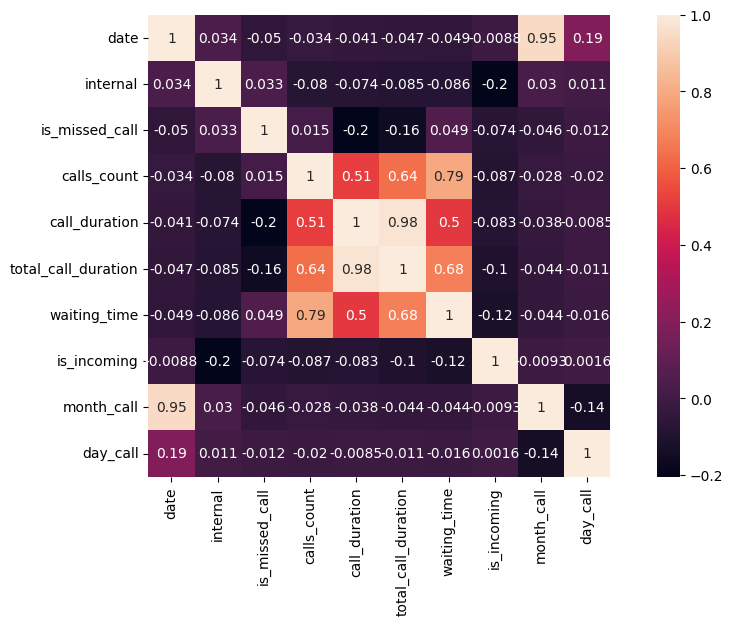

In [189]:
calls_data['is_incoming'] = (calls_data['direction'] == 'in').astype(int)

df= calls_data.drop(['direction','user_id','operator_id'], axis=1)
df_corr = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True, square=True)
plt.show()

Correlación positiva fuerte:

- calls_count, call_duration y total_call_duration están fuertemente correlacionadas entre sí. Esto es lógico, ya que a mayor número de llamadas, mayor será la duración total de las llamadas.

Correlaciones moderadas:

- is_missed_call tiene una correlación positiva moderada con waiting_time. Esto sugiere que las llamadas perdidas tienden a tener tiempos de espera más largos.

- calls_count tiene una correlación positiva moderada con waiting_time. Esto podría indicar que a medida que aumenta el número de llamadas, también aumenta el tiempo de espera en promedio.

### 9. Recomendaciones para CallMeMaybe 
---

- Gestión del Volumen de Llamadas:

1. Predicción de la demanda: Utilizar herramientas de análisis de datos para predecir el volumen de llamadas y ajustar la plantilla de operadores en consecuencia.

2. Implementación de un sistema de cola virtual: Reducir el tiempo de espera de los clientes al permitirles dejar un mensaje y ser contactados más tarde.

3. Ofrecer opciones de autoservicio: Implementar un sistema de autoservicio para que los clientes puedan encontrar respuestas a sus preguntas más comunes sin necesidad de hablar con un operador.

- Optimización de Procesos:

1. Simplificación de flujos de trabajo: Revisar y optimizar los procesos existentes para eliminar pasos innecesarios y agilizar la atención a los clientes.

2. Implementación de herramientas tecnológicas: Utilizar herramientas como CRM, sistemas de gestión de llamadas y chatbots para automatizar tareas y mejorar la eficiencia.

3. Establecimiento de métricas claras: Definir indicadores clave de desempeño (KPI) para medir la eficiencia de los operadores y establecer objetivos claros.

- Otras variables a considerar:

1. Complejidad de las llamadas: Las llamadas que requieren una mayor atención o conocimientos especializados pueden aumentar el tiempo de resolución.

2. Disponibilidad de información: La falta de acceso a la información necesaria puede prolongar el tiempo de resolución de las llamadas.

Capacitación del operador: Un operador con menor experiencia o capacitación puede tardar más en resolver un problema.
Al analizar estos factores en conjunto, se puede obtener una comprensión más completa de los factores que influyen en el tiempo de espera y tomar decisiones más informadas para mejorar la eficiencia de los operadores y la satisfacción del cliente.




### 10. Fuentes utilizadas
---

https://matplotlib.org/stable/gallery/color/named_colors.html
https://www.pontia.tech/como-hacer-un-analisis-de-datos-paso-a-paso-2/
https://openwebinars.net/blog/importancia-del-preprocesamiento-de-datos-en-proyectos-de-data-science/
https://support.prezi.com/hc/es/articles/360045085774--C%C3%B3mo-elegir-el-gr%C3%A1fico-correcto-para-tus-datos
https://www.phonex.com.mx/blog/estrategias-para-maximizar-la-productividad-de-los-agentes-telefonicos-en-un-centro-de-contacto
https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/




### 11. Presentación del proyecto
---
Link: https://drive.google.com/file/d/12XfOwY8hxwIp0-1CFor5g07H1zOHEgNc/view?usp=drive_link